In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Upon importing the data, we can extract some useful information for the analysis.

In [30]:
iris = pd.read_csv('iris.data', sep=',', 
                   header=None,
                   names=['sepal length','sepal width','petal length','petal width','class'])

iris.info() #class is an onject type, everything else is float; 150 entries
iris.isnull().values.any() #no missing values
iris.describe() #basic stats of the data
iris.head() #displays the first 5 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can prepare 2 scatter plots: sepal_width vs sepal_length and petal_width vs petal_length. 
Scatter plots show each class in different color.

Text(0.5, 1, 'Sepal Width VS Sepal Length')

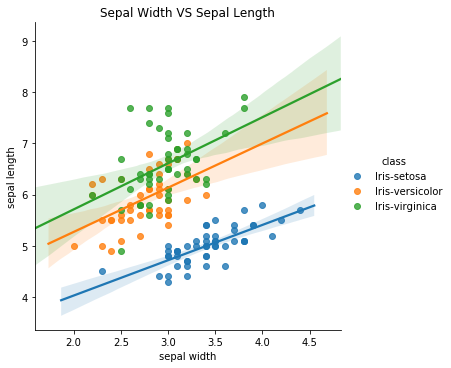

In [31]:
scar1 = sns.lmplot(x= 'sepal width', y= 'sepal length', data = iris, hue= 'class')
plt.title('Sepal Width VS Sepal Length')

Text(0.5, 1, 'Petal Width VS Petal Length')

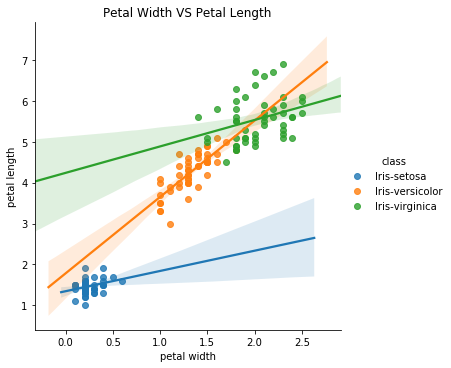

In [32]:
scar2 = sns.lmplot(x= 'petal width', y= 'petal length', data = iris, hue= 'class')
plt.title('Petal Width VS Petal Length')

Prepareing the data for classification using the pandas operators for the feature variables X and the response Y for the fit.

In [33]:
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species num'] = [iris_class[i] for i in iris['class']]
#mapped the iris classes to the numbers:0, 1, 2

X = iris.drop(['class', 'species num'], axis=1)
y = iris['species num']

X_train, X_test, y_train, y_test = train_test_split(X, y)

Run the fit using KNeighborsClassifier from sklearn.neighbors:

In [34]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Useing learning model to predict the class from features, we try to predict X from the test part:

In [35]:
x_predict = model.predict(X_test)
x_predict

array([2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2,
       0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1], dtype=int64)

We can get the accuracy score of the prediction by comparing predicted iris classes and the Y values from the test. This leads us to get a score of approximatley 97% (upon running it once; the value will change upon running it again).

In [36]:
model.score(X_test, y_test)

0.9736842105263158

We want to see how accuracy score and the number of correct predictions change with the number of neighbors, k. We will use the following number of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50.

Generateing 10 random train/test splits for each value of k:

In [37]:
#k=1:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size= 10, train_size = 10)

#k=3:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size= 10, train_size = 10)

#k=5:
X5_train, X5_test, y5_train, y5_test = train_test_split(X, y, test_size= 10, train_size = 10)

#k=7:
X7_train, X7_test, y7_train, y7_test = train_test_split(X, y, test_size= 10, train_size = 10)

#k=10:
X10_train, X10_test, y10_train, y10_test = train_test_split(X, y, test_size= 10, train_size = 10)

#from here I had to change the train/test size to match the neighbours as part b would not work properly
#because number of neighbours > test/train size

#k=20:
X20_train, X20_test, y20_train, y20_test = train_test_split(X, y, test_size= 20, train_size = 20)

#k=30:
X30_train, X30_test, y30_train, y30_test = train_test_split(X, y, test_size= 30, train_size = 30)

#k=40:
X40_train, X40_test, y40_train, y40_test = train_test_split(X, y, test_size= 40, train_size = 40)

#k=50:
X50_train, X50_test, y50_train, y50_test = train_test_split(X, y, test_size= 50, train_size = 50)

Fit the model for each split and generate predictions:

In [38]:
#k=1:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(X1_train, y1_train)
model_1.predict(X1_test)

#k=3:
model_3 = KNeighborsClassifier(n_neighbors=3)
model_3.fit(X3_train, y3_train)
model_3.predict(X3_test)

#k=5:
model_5 = KNeighborsClassifier(n_neighbors=5)
model_5.fit(X5_train, y5_train)
model_5.predict(X5_test)

#k=7:
model_7 = KNeighborsClassifier(n_neighbors=7)
model_7.fit(X7_train, y7_train)
model_7.predict(X7_test)

#k=10:
model_10 = KNeighborsClassifier(n_neighbors=10)
model_10.fit(X10_train, y10_train)
model_10.predict(X10_test)

#k=20:
model_20 = KNeighborsClassifier(n_neighbors=20)
model_20.fit(X20_train, y20_train)
model_20.predict(X20_test)

#k=30:
model_30 = KNeighborsClassifier(n_neighbors=30)
model_30.fit(X30_train, y30_train)
model_30.predict(X30_test)

#k=40:
model_40 = KNeighborsClassifier(n_neighbors=40)
model_40.fit(X40_train, y40_train)
model_40.predict(X40_test)

#k=50:
model_50 = KNeighborsClassifier(n_neighbors=50)
model_50.fit(X50_train, y50_train)
model_50.predict(X50_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

Now we can get the average the accuracy score for each k:

In [39]:
#k=1:
score_1 = model_1.score(X1_test, y1_test)
score_1 

#k=3:
score_3 = model_3.score(X3_test, y3_test)
score_3 

#k=5:
score_5 = model_5.score(X5_test, y5_test)
score_5 

#k=7:
score_7 = model_7.score(X7_test, y7_test)
score_7 

#k=10:
score_10 = model_10.score(X10_test, y10_test)
score_10 

#k=20:
score_20 = model_20.score(X20_test, y20_test)
score_20 

#k=30:
score_30 = model_30.score(X30_test, y30_test)
score_30 

#k=40:
score_40 = model_40.score(X40_test, y40_test)
score_40

#k=50:
score_50 = model_50.score(X50_test, y50_test)
score_50 

0.24

And the average number of correct predictions for each k as well:

In [40]:
#k=1: 
model_1.predict(X1_test) == y1_test #10/10

#k=3:
model_3.predict(X3_test) == y3_test #9/10

#k=5:
model_5.predict(X5_test) == y5_test #6/10

#k=7:
model_7.predict(X7_test) == y7_test #7/10

#k=10:
model_10.predict(X10_test) == y10_test #1/20

#k=20:
model_20.predict(X20_test) == y20_test #5/20

#k=30:
model_30.predict(X30_test) == y30_test #10/30

#k=40:
model_40.predict(X40_test) == y40_test #6/40

#k=50:
model_50.predict(X50_test) == y50_test #15/50

# **** THESE ARE THE FRACTIONS I GOT UPON MY LAST RUN OF THE MODEL, WITH EACH RUN THE NUMBERS CHANGE SLIGHTLY; 
#THUS THE OVERALL GRAPH ALSO CHANGES ****

11     False
126     True
89     False
105     True
120     True
12     False
51     False
130     True
53     False
26     False
22     False
23     False
124     True
76     False
38     False
101     True
19     False
118     True
77     False
123     True
137     True
56     False
20     False
133     True
40     False
7      False
49     False
25     False
59     False
39     False
93     False
94     False
60     False
58     False
10     False
72     False
44     False
71     False
18     False
45     False
1      False
47     False
15     False
63     False
32     False
33     False
73     False
74     False
149     True
144     True
Name: species num, dtype: bool

Composing the differnet accuracy scores into a Series for easy viewing, and then plotting them we can gather some conclusions.

In [41]:
df1 = pd.Series([score_1, score_3, score_5, score_7, score_10, score_20, score_30, score_40, score_50]) 
df1

0    1.000
1    0.900
2    0.600
3    0.700
4    0.300
5    0.450
6    0.400
7    0.425
8    0.240
dtype: float64

Text(0, 0.5, 'Accuracy Score')

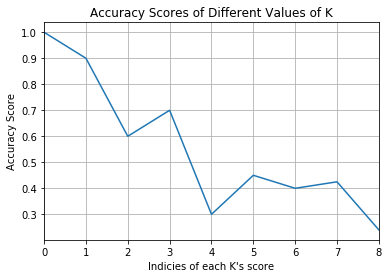

In [42]:
df1.plot(kind = 'line', title = 'Accuracy Scores of Different Values of K', grid = True)
plt.xlabel("Indicies of each K's score")
plt.ylabel('Accuracy Score')

Based off the graph we can conclude that as k (the number of neighbours) increases, the accuracy decreases (this is the general trend observed no matter how many times the model was run and the accuracy scores changed).